In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
import re
import nltk
import matplotlib.pyplot as plt
%matplotlib inline

from keras.layers import Input
import tensorflow as tf
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical, pad_sequences
from keras.models import Model
from keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, concatenate, LSTM
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [ ]:
d = pd.read_csv('/content/drive/MyDrive/Scraped_Car_Review_ford.csv')
d = pd.DataFrame(d)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scrapped_Car_Reviews_Audi.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scraped_Car_Review_mercedes_benz.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scraped_Car_Review_nissan.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scrapped_Car_Review_Chevrolet.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scrapped_Car_Reviews_BMW.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)

t = pd.read_csv('/content/drive/MyDrive/Scrapped_Car_Reviews_Volkswagen.csv', index_col=None, header=0, engine='python')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)


t = pd.read_csv('/content/drive/MyDrive/Scraped_Car_Review_dodge.csv')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)




t = pd.read_csv('/content/drive/MyDrive/Scrapped_Car_Reviews_Toyota.csv')
t = pd.DataFrame(t)
print(t.shape)
d = d._append(t, ignore_index=True)
print(d.shape)


d.head()

(26791, 6)
(7663, 7)
(34454, 7)
(10060, 7)
(44514, 7)
(13790, 7)
(58304, 7)
(25501, 7)
(83805, 7)
(10382, 7)
(94187, 7)
(11359, 7)
(105546, 7)
(11544, 6)
(117090, 7)
(22677, 6)
(139767, 7)


,Review_Date,Author_Name,Vehicle_Title,Review_Title,Review,Rating,Unnamed: 0
0,on 06/06/18 14:19 PM (PDT),Vicki,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,2006 Mustang GT,Doesn’t disappoint,5.0,NaN
1,on 08/12/17 06:06 AM (PDT),Tom,2006 Ford Mustang Coupe V6 Standard 2dr Coupe ...,DREAM CAR,I bought mine 4/17 with 98K. Have been wantin...,3.0,NaN
2,on 06/15/17 05:43 AM (PDT),Ray,2006 Ford Mustang Coupe V6 Premium 2dr Coupe (...,Great Ride,There will always be a 05-09 mustang for sale...,5.0,NaN
3,on 05/18/17 17:33 PM (PDT),Don Watson,2006 Ford Mustang Coupe V6 Deluxe 2dr Coupe (4...,I have wanted a Mustang for 40 years.,I bought my car from an auction I work at ( A...,5.0,NaN
4,on 01/03/16 18:03 PM (PST),One owner,2006 Ford Mustang Coupe GT Premium 2dr Coupe (...,One owner,I bought this car spankin new and i still am ...,5.0,NaN


In [ ]:
df = pd.DataFrame()
df['review'] = d['Review']

In [ ]:
print(d['Rating'].value_counts())

Rating
5.000    27115
4.875    12829
4.750     9541
4.000     7302
4.625     6984
4.500     5452
4.375     4199
4.250     3515
3.000     3221
4.125     2971
1.000     2135
2.000     2130
3.875     1985
3.750     1797
3.625     1486
3.500     1414
3.375     1293
3.250     1224
3.125     1105
2.875      943
2.750      942
2.625      769
2.500      767
2.375      627
2.250      591
2.125      470
1.875      320
1.750      306
1.500      222
1.625      222
1.375      137
1.250      113
1.125       62
Name: count, dtype: int64


In [ ]:
df['sentiment'] = pd.cut(d['Rating'], bins=[1,2.751,3.751,5], labels=['negative','neutral','positive'])
# df['sentiment'] = pd.cut(d['Rating'], bins=[1,3,5], labels=['negative', 'positive'])
#df['sentiment'] = d['Rating']

In [ ]:
print(df.shape)
df[35:45]

(139767, 2)


,review,sentiment
35,My 2006 Mustang GT is my seventh Mustang and ...,positive
36,We ordered our's Labor Day of '05 and picked ...,positive
37,"I wanted the gt for many years, so I finally ...",neutral
38,"I'll be sad to see mine go. I've had BMW's, C...",positive
39,I have owned my car for 3 years. Wanted one s...,neutral
40,"Bought my 2006 GT with 5,000 miles on it and ...",positive
41,"The 2006 Mustang v6 Coupe is my 7th Mustang, ...",negative
42,I got back into the Mustang as a retiree and ...,positive
43,As soon as I got a glimpse of the 2006 Mustan...,positive
44,I bought my Mustang new and right away I inst...,positive


In [ ]:
df['sentiment'].isna().sum()

37713

In [ ]:
df['review'].isna().sum()

29661

In [ ]:
df = df.dropna(subset=['review'])
print(df['review'].isna().sum())
print(df.shape)

0
(110106, 2)


In [ ]:
df = df.dropna(subset=['sentiment'])
print(df['sentiment'].isna().sum())
print(df.shape)

0
(102054, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


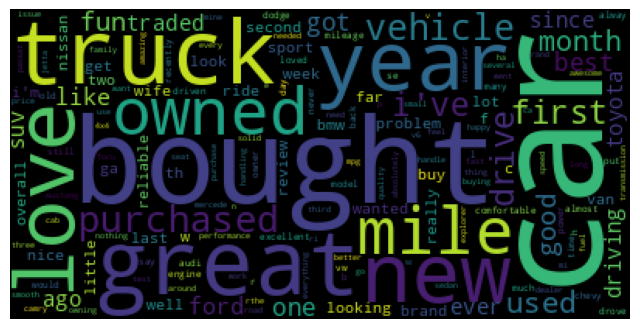

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['review'] = df['review'].apply(clean_text)

text = df['review'].to_string().lower() # or save it into different columns
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Plot sentimen(output label) frequency

Text(0.5, 1.0, 'Frequncy of aspect')

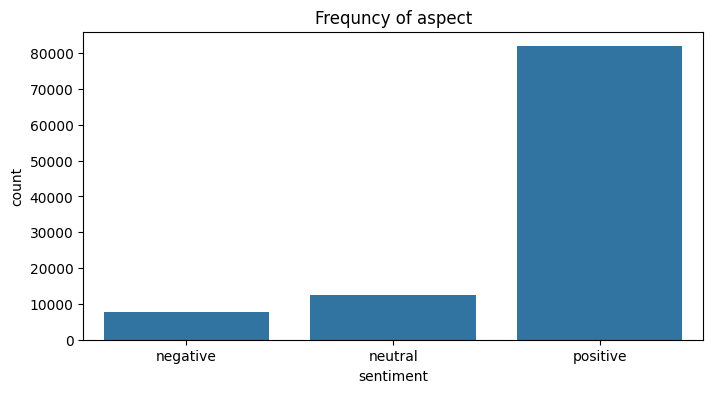

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['sentiment'])
plt.title("Frequncy of aspect")

In [ ]:
df['sentiment'].value_counts()

sentiment
positive    81893
neutral     12483
negative     7678
Name: count, dtype: int64

In [ ]:
# If the  number of dataset for each output label is not almost same it is very problematic
# therefore removed some data and make equal number of sample
remove_count = int(len(df[df['sentiment'] == 'positive']) * 0.60) #.65 is 71.68% accuracy
positive_indices = df[df['sentiment'] == 'positive'].index
remove_indices = np.random.choice(positive_indices, size=remove_count, replace=False)
df = df.drop(remove_indices)
print(df.shape)

(52919, 2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


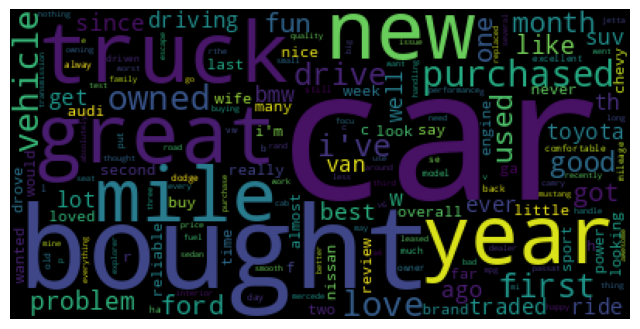

In [ ]:
nltk.download('stopwords')

from nltk.corpus import stopwords
from wordcloud import WordCloud
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s
df['review'] = df['review'].apply(clean_text)

text = df['review'].to_string().lower() # or save it into different columns
wordcloud = WordCloud(
    collocations=False,
    relative_scaling=0.5,
    stopwords=set(stopwords.words('english'))).generate(text)

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Text(0.5, 1.0, 'Frequncy of aspect')

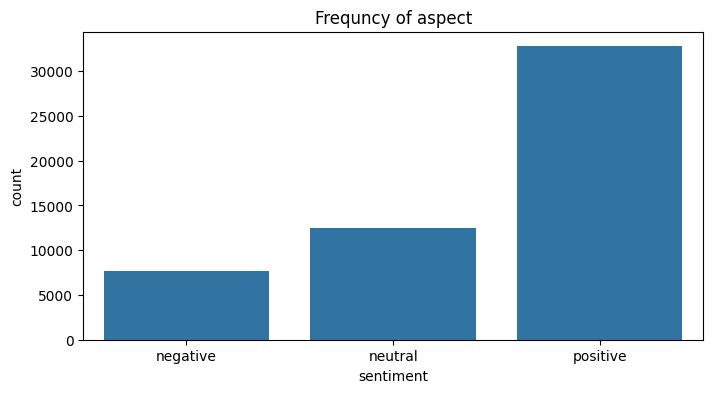

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x=df['sentiment'])
plt.title("Frequncy of aspect")

In [ ]:
print(df.shape)
print(df['sentiment'].value_counts())

(52919, 2)
sentiment
positive    32758
neutral     12483
negative     7678
Name: count, dtype: int64


In [ ]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Preprocessing
def preprocess_text(text):
    # remove punctuations
    text = re.sub('[^a-zA-Z]', ' ', text)
    # convert to lowercase
    text = text.lower()
    # remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


In [ ]:
df['review'] = df['review'].apply(preprocess_text)

In [ ]:
# Tokenization
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['review'].values)

# Convert text to sequences
X_review = tokenizer.texts_to_sequences(df['review'].values)

# Pad sequences
max_sequence_length = 100
X_review = pad_sequences(X_review, maxlen=max_sequence_length)

# Label encoding
y = pd.get_dummies(df['sentiment']).values

In [ ]:
# Split train and test
X_train_review, X_test_review, y_train, y_test = train_test_split(X_review, y, test_size=0.2, random_state=42)

In [ ]:
from keras.models import Model
from keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dropout, Dense, LSTM, Reshape


embedding_dim = 100
vocab_size = len(tokenizer.word_index) + 1

# Review input
review_input = Input(shape=(max_sequence_length,))
review_embedding = Embedding(vocab_size, embedding_dim, input_length=max_sequence_length)(review_input)
review_lstm = LSTM(32, return_sequences=True)(review_embedding)
review_reshaped = Reshape((-1, 32))(review_lstm)  # Reshape the output for Conv1D
review_conv = Conv1D(64, 5, activation='relu')(review_reshaped)
review_lstm = LSTM(64, return_sequences=True)(review_conv)
review_reshaped = Reshape((-1, 64))(review_lstm)  # Reshape the output for Conv1D
review_conv = Conv1D(128, 5, activation='relu')(review_reshaped)
review_pooling = GlobalMaxPooling1D()(review_conv)
dropout = Dropout(0.2)(review_pooling)
dense = Dense(32, activation='relu')(dropout)
dense = Dense(64, activation='relu')(dense)
dense = Dense(128, activation='relu')(dense)
dropout = Dropout(0.2)(dense)
output = Dense(3, activation='softmax')(dropout)

model = Model(inputs=review_input, outputs=output)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 100)          3856900   
                                                                 
 lstm (LSTM)                 (None, 100, 32)           17024     
                                                                 
 reshape (Reshape)           (None, 100, 32)           0         
                                                                 
 conv1d (Conv1D)             (None, 96, 64)            10304     
                                                                 
 lstm_1 (LSTM)               (None, 96, 64)            33024     
                                                                 
 reshape_1 (Reshape)         (None, 96, 64)            0     

In [ ]:
# Train the model
epochs = 10 #20, 50,
batch_size = 32
checkpoint = ModelCheckpoint('/content/drive/MyDrive/overall_sentiment_model.hdf5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train_review, y_train, validation_data=(X_test_review, y_test),
                    epochs=epochs, batch_size=batch_size, callbacks=[checkpoint])

Epoch 1/10
1323/1323 [==============================] - ETA: 0s - loss: 0.6442 - accuracy: 0.7094
Epoch 1: val_accuracy improved from -inf to 0.74282, saving model to /content/drive/MyDrive/LSBU/Shakib/overall_sentiment_model.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1323/1323 [==============================] - 281s 208ms/step - loss: 0.6442 - accuracy: 0.7094 - val_loss: 0.5777 - val_accuracy: 0.7428
Epoch 2/10
1323/1323 [==============================] - ETA: 0s - loss: 0.5524 - accuracy: 0.7504
Epoch 2: val_accuracy did not improve from 0.74282
1323/1323 [==============================] - 256s 194ms/step - loss: 0.5524 - accuracy: 0.7504 - val_loss: 0.5862 - val_accuracy: 0.7426
Epoch 3/10
1323/1323 [==============================] - ETA: 0s - loss: 0.5081 - accuracy: 0.7740
Epoch 3: val_accuracy did not improve from 0.74282
1323/1323 [==============================] - 260s 196ms/step - loss: 0.5081 - accuracy: 0.7740 - val_loss: 0.5916 - val_accuracy: 0.7379
Epoch 4/10
1323/1323 [==============================] - ETA: 0s - loss: 0.4665 - accuracy: 0.7970
Epoch 4: val_accuracy did not improve from 0.74282
1323/1323 [==============================] - 274s 207ms/step - loss: 0.4665 - accuracy: 0.7970 - val_loss: 0.6339 - val_accuracy: 0.7375
Epoch

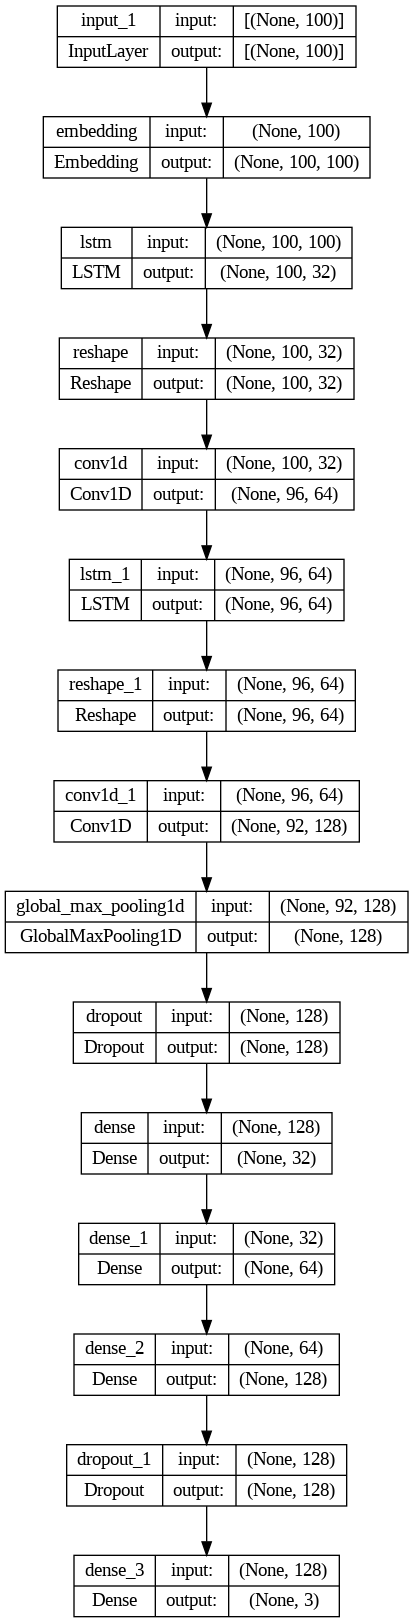

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Load the best model weights
model.load_weights('/content/drive/MyDrive/overall_sentiment_model.hdf5')

# Evaluate the model
y_pred = model.predict(X_test_review)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))
print(confusion_matrix(y_true, y_pred))
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

331/331 [==============================] - 13s 37ms/step
              precision    recall  f1-score   support

           0       0.57      0.43      0.49      1518
           1       0.51      0.45      0.47      2500
           2       0.84      0.93      0.88      6566

    accuracy                           0.74     10584
   macro avg       0.64      0.60      0.62     10584
weighted avg       0.72      0.74      0.73     10584

[[ 653  678  187]
 [ 423 1113  964]
 [  62  408 6096]]
Accuracy: 74.28%


331/331 [==============================] - 22s 65ms/step


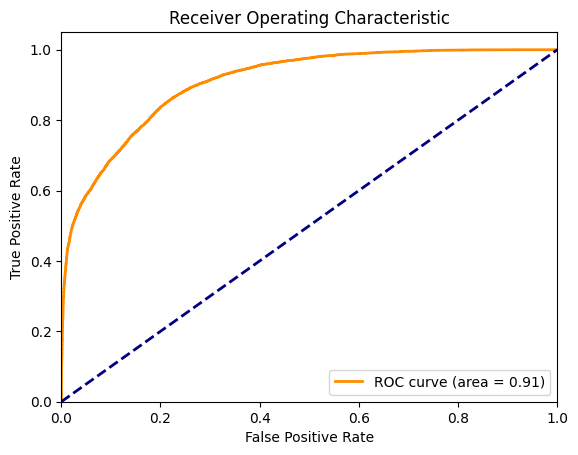

In [ ]:
# ROC curve
y_scores = model.predict(X_test_review)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_scores.ravel())
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


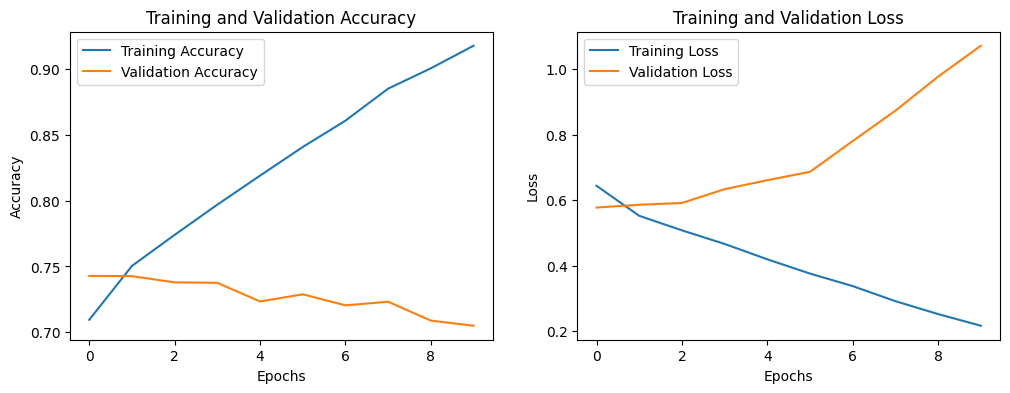

In [ ]:
# Plot accuracy and loss over epochs
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

